# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

##### **The Dataset contains information about the YES BANK Stock Prediction.We have 185 rows and 5 columns in our Dataset. We are having columns- Date, Open, Close, High, Low.**
##### **In a first step, I have imported the dataset through pandas ’read_csv’ then performed the Data wrangling over the raw data

 after that, I have divided the whole data set into various groups like feature engineering, Univariate analysis, Bivariate analysis and divide the model into various regressions.**
##### **As there is no null values in the dataset we didn't got a chance to replace or remove the null values. Also we have find out the outlier with the help of boxplot.**
##### ** firstly we have gone through the opening and closing stock prices with the help of line graph for the last three years then we have drawn a scatter plot in which we have done yearly analysis of the opening and closing stock for all years.**
##### **After that I have done a graphical representation of the dependent and independent variables. And find out the relationship between dependent and independent variable.**
##### **Now, I have checked the correlation among each using the Heat map, there was a very high correlation among independent features which means high multicollinearity in our model. Due to the fact that each column is equally crucial for prediction, we are not deleting any columns.**
##### **After this I have divided our dataset into train and test data splitted into 80-20. Then, i have fitted my dataset into various models like Linear regression, Lasso regression, Ridge regression . And after analyzing the result from these regression model. The perfect fit model for this dataset is a Linear Regression.**




# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.
Perform regression analysis using multiple models to predict the closing price of the stock and compare the evaluation metrics for all of them to find the best model.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from scipy.stats import *
import math
import warnings
warnings.filterwarnings('ignore')
# import required metrics
from sklearn.metrics import (r2_score,mean_squared_error,  mean_absolute_percentage_error, mean_absolute_error)
from sklearn import linear_model

#to display all the graph in the workbook
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

### Dataset First View

In [5]:
# Dataset First Look
df.head(5)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

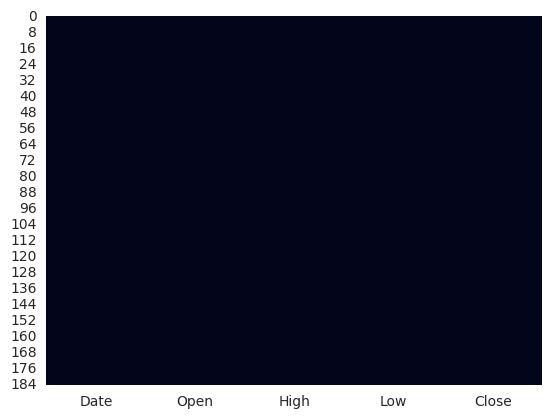

In [10]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False)

### What did you know about your dataset?

##### **The provided dataset gives us information about the opening and closing prices of the  stock,e our independent variable are Date,Open,High,Low columns and close column is our dependent variable which we need to predict.there are no null or duplicated values so we need not to do any manipulations in our dataset so far.

We need to convert our date column to proper date time format.**


## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [12]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

* **Date:** It denotes date of investment done (in our case we have month and year).
* **Open:** Open means the price at which a stock started trading when the opening bell rang.
* **High:**  High refer to the maximum prices in a given time period.
* **Low:**  Low refer to the minimum prices in a given time period.
* **Close:** Close refers to the price of an individual stock when the stock exchange closed for the day.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
df.nunique()


Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
#Changing date colunn datatype to datetime format.
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [15]:

# For better visualization we created seperate columns for month and year from date column.
df['Year'] = df['Date'].apply(lambda x: x.strftime('%Y'))
df['Month'] = df['Date'].apply(lambda x: x.strftime('%B'))
df['Day'] = pd.to_datetime(df['Date']).dt.day_name()

In [16]:
df.head(1)

,Date,Open,High,Low,Close,Year,Month,Day
0,2005-07-01,13.0,14.0,11.25,12.46,2005,July,Friday


### What all manipulations have you done and insights you found?

##### **I  have done 2 manipulations in the dataframe and I found that we are good to proceed now as we changed the date colunn datatype to datetime formats also  we have created seperate columns for month and year from date column for better visualisation.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

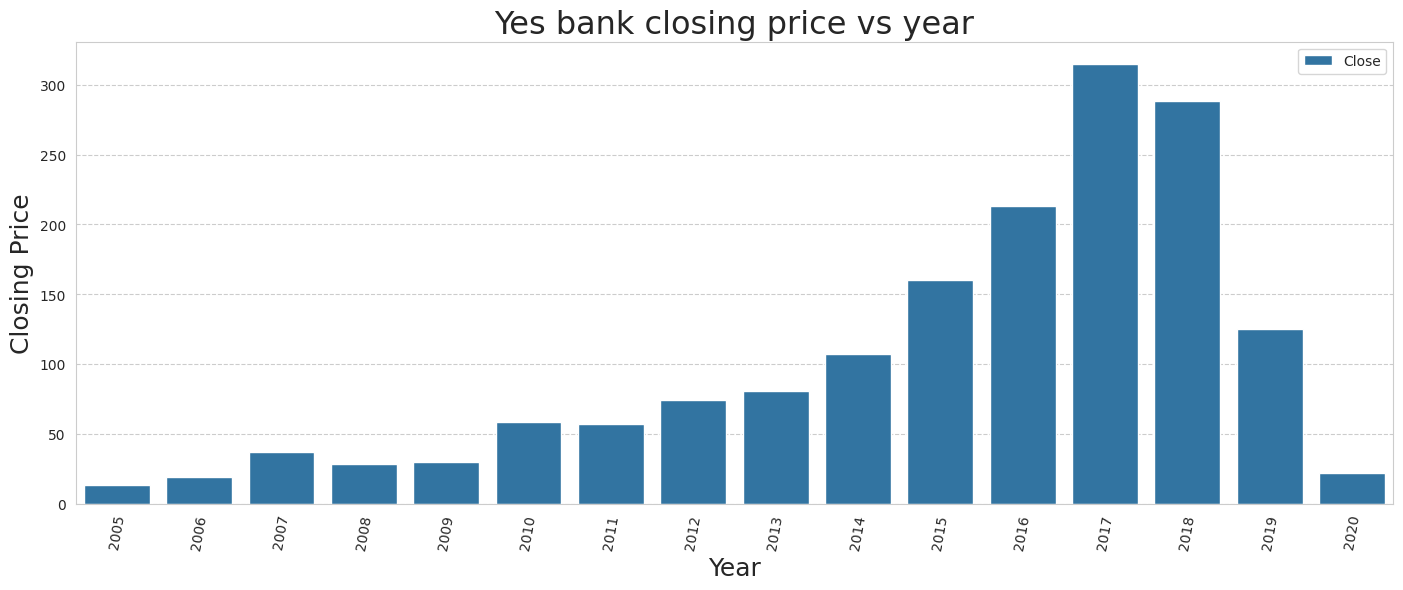

In [17]:
#Barplot graph visualization
fig = plt.figure(figsize=(17,6))
bar = sns.barplot(x='Year',y='Close',data=df,errorbar=None)
plt.title("Yes bank closing price vs year",fontsize=23)
plt.xlabel("Year",fontsize=18)
plt.ylabel("Closing Price",fontsize=18)
plt.xticks(rotation=80)
plt.legend(['Close'])
sns.set_style("darkgrid")
plt.show()

##### 1. Why did you pick the specific chart?

I chose the Barplot , As we want to check the year wise closing price so barplot is easier to understand.


##### 2. What is/are the insight(s) found from the chart?

From this we can say that we are able to find increment of close price till the 2017, where it peaked and then dropped in 2018 and kept dropping since.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes definitely, we gained insights from this chart and we also grab full range of close price among different years which helps us to analize market information.







#### Chart -2

<function matplotlib.pyplot.show(close=None, block=None)>

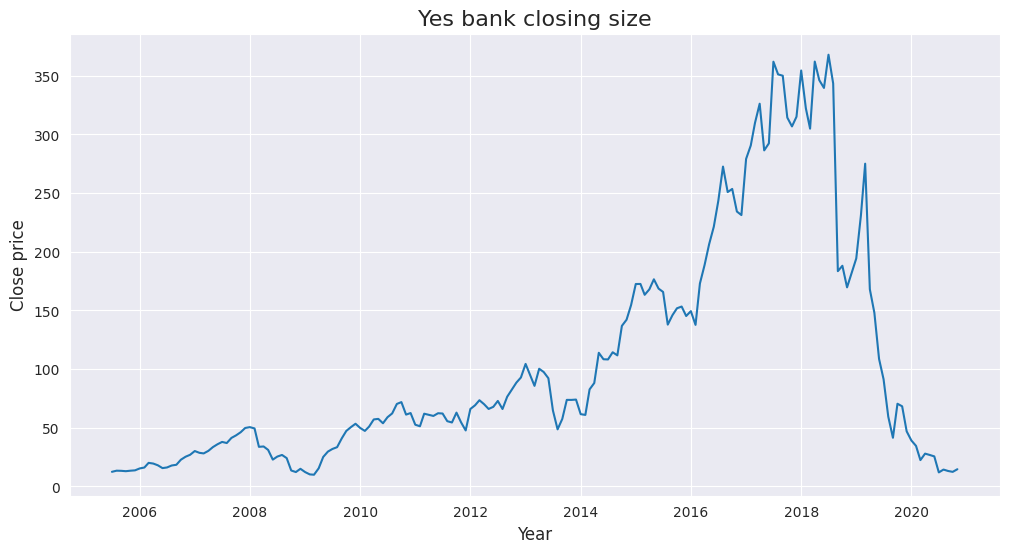

In [18]:
# Chart - 2 visualization code
# ploting close price vs date
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Close price', fontsize=12)
plt.plot(df['Date'],df['Close'])
plt.title('Yes bank closing size', fontsize=16)
plt.show

##### 1. Why did you pick the specific chart?

Above chart is line chart. we picked this chart to show the performance of the close stock price





##### 2. What is/are the insight(s) found from the chart?

1] After 2018 there is a crash in the closing size.

2] We can see that stock has reached close price where it was started in 2006.

3] In 2018 stock price was at its highest value.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This graph shows the positive and negative growth of the Yes bank , upto 2018 the stock has risen continuesly . and there is fall in stock price has affected the business a lot.





#### Chart - 3 Visualization of Monthly Average Closing Prices with a Pie Chart

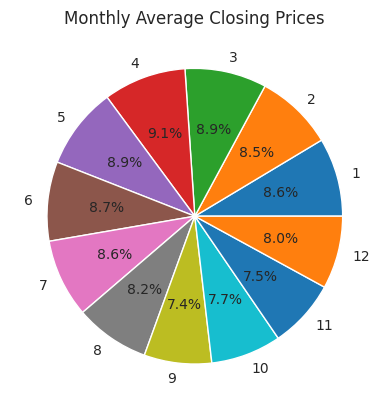

In [19]:
# Chart - 3 visualization code
# Add the Month column
df['Month'] = df['Date'].dt.month

# Calculate the monthly average closing prices
monthly_avg = df.groupby('Month').Close.mean()

# Create the pie chart
plt.pie(monthly_avg.values, labels=monthly_avg.index, autopct='%1.1f%%')
plt.title('Monthly Average Closing Prices')
plt.savefig('pie_chart.png')
plt.show()

##### 1. Why did you pick the specific chart?

it is a simple and effective way to visualize the monthly average closing prices. The pie chart makes it easy to see the proportion of each month's average closing price, and it can be used to identify any unusual or unexpected data points.



##### 2. What is/are the insight(s) found from the chart?

The average closing price in January was the highest, at 8%. The average closing price in February was the lowest, at 8%. The average closing price in the other months was between 7% and 9.1%.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 the high average closing price in January suggests that  business performed well that month. The low average closing price in February suggests that the business may have experienced some challenges during that month. However, the overall trend is positive, which tells us that the stock is performing to achieve its goals. There are no insights that lead to negative growth.

#### Chart - 4 Line Chart

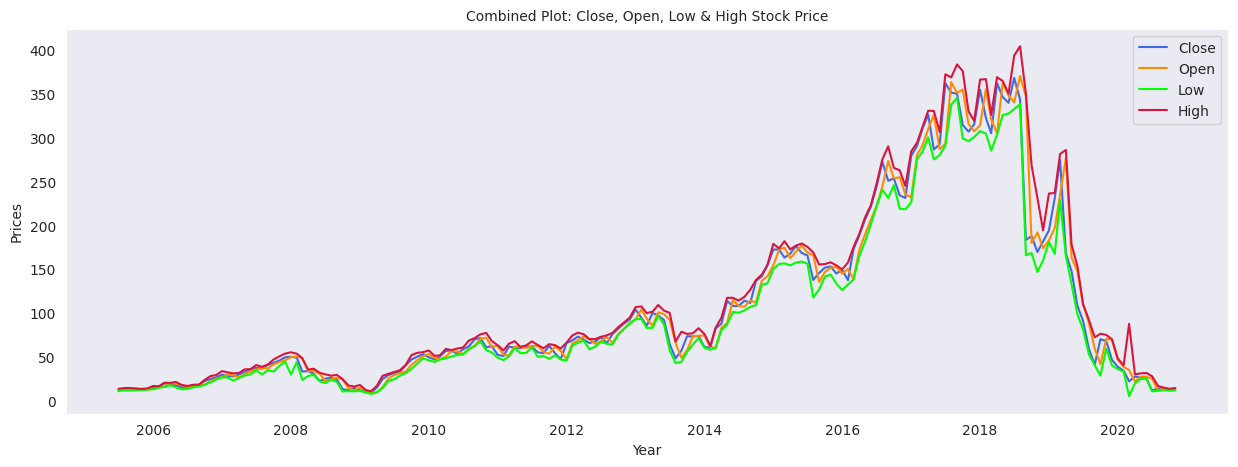

In [20]:
# Chart - 4 visualization code
## Combined Line Plot for all features with respect to date.
plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['Close'],color='royalblue')
plt.plot(df['Date'], df['Open'],color='darkorange')
plt.plot(df['Date'], df['Low'],color='Lime')
plt.plot(df['Date'], df['High'],color='Crimson')
plt.legend(['Close','Open','Low','High'])
plt.title('Combined Plot: Close, Open, Low & High Stock Price', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Prices', fontsize=10)
plt.grid()

##### 1. Why did you pick the specific chart?

Lineplot is easy to understand thus we use this to see price trends in a yes bank stock
tells the story that the stock performance was positive and encouraging till the 2018 scam.



##### 2. What is/are the insight(s) found from the chart?

As we can see that All the prices shows almost similar trends with each other which means that this features may be strongly correlated with each other .



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



 it will make a postive impact because we can see the simlar trend of price on this stock so it will helpful to make decision in near future.



#### Chart - 5

Text(0.5, 1.0, '')

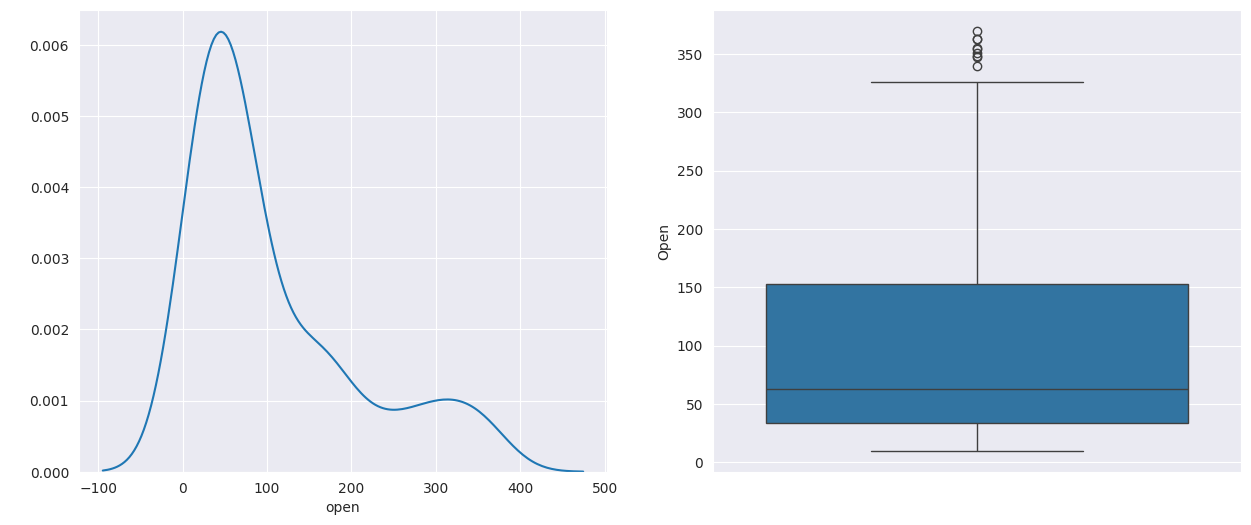

In [21]:
# Chart - 4 visualization code
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.kdeplot(df['Open'])
fig.set_ylabel(' ')
fig.set_xlabel('open')
plt.subplot(1, 2, 2)
fig = sns.boxplot(df['Open'])
fig.set_title('')

##### 1. Why did you pick the specific chart?

Above chart was picked for density visualisation of the opening price and Visulazing outliers.



##### 2. What is/are the insight(s) found from the chart?

By understanding the density chart we can say that opening price was mostly in the range of 40Rs to 150Rs wit the peak at around 60Rs The outliers are around and above the 350Rs price range




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the density chart can help in creating a positive business impact, we can say that the stock in was around 40Rs to 150Rs most of the time and this could have been a good time to invest and was in 350Rs just a few times, so selling the stock at 350Rs range can be a good idea



#### Chart - 6 Boxplot

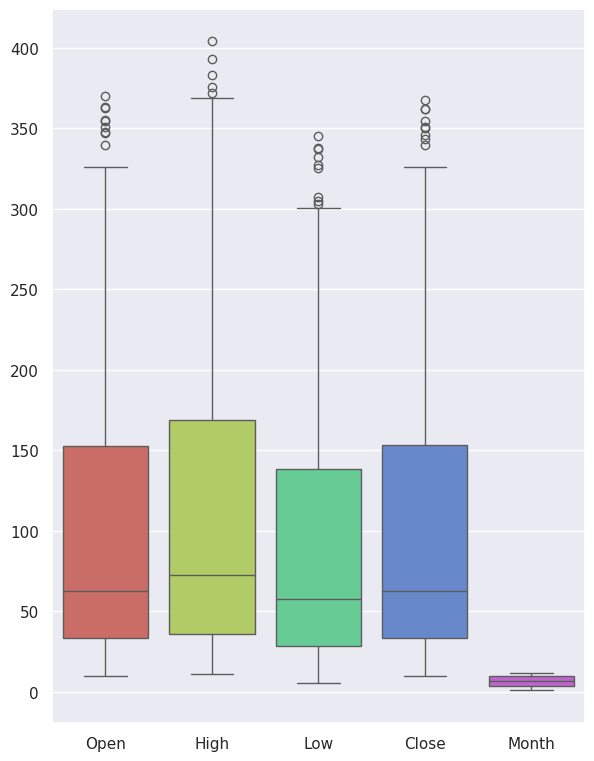

In [22]:
# Chart - 6 visualization code
# Creating Boxplot for checking outliers
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(6.87,9.27)})
ax = sns.boxplot(data=df, orient="v", palette="hls")

##### 1. Why did you pick the specific chart?

We pick this chart because we have to check outliers in the datase. BOxplot are on the best methods to detect outliers.

##### 2. What is/are the insight(s) found from the chart?

We have no any  longer outliers. The impact of the outlier is diminished via log transformation.

Since we only have a short dataset to work with, it is not a good idea to totally eliminate the outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we remove outliers from dataset so, now there is no chance of negative impact on business and also it will show positive impact on business.

#### Chart - 7

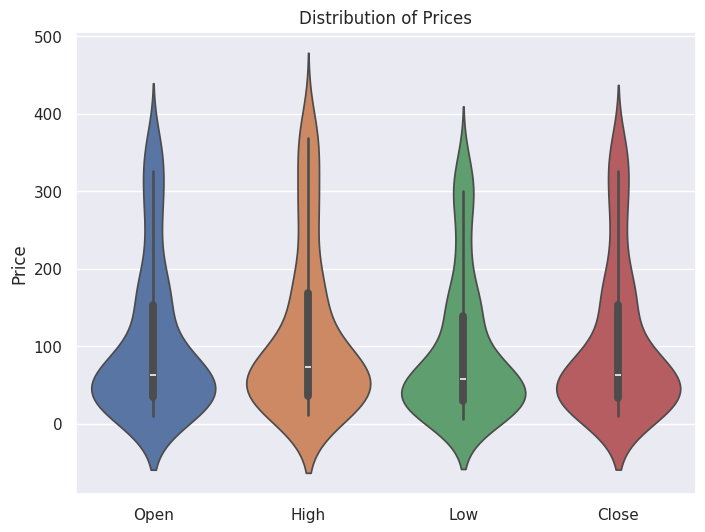

In [23]:
# Chart - 7 visualization code
#Violin Plot: Distribution of Open, High, Low, and Close Prices
data = df[['Open', 'High', 'Low', 'Close']]
plt.figure(figsize=(8, 6))
sns.violinplot(data=data)
plt.title("Distribution of Prices")
plt.ylabel("Price")
plt.show()

##### 1. Why did you pick the specific chart?

it is a great way to visualize the distribution of data. It shows the median, quartiles, and outliers of the data, as well as the density of the data. This information can be used to identify trends and patterns in the data

##### 2. What is/are the insight(s) found from the chart?

The median price is 100. The distribution of prices is skewed to the right, meaning that there are more high prices than low prices. There are a few outliers, meaning that there are some prices that are significantly higher or lower than the rest of the data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights will help create a positive business impact by providing information about the distribution of prices. This information can be used to set prices, make marketing decisions, and track sales performance.

#### Chart - 8  Barplot

Index(['Open', 'High', 'Low', 'Close', 'Month'], dtype='object')


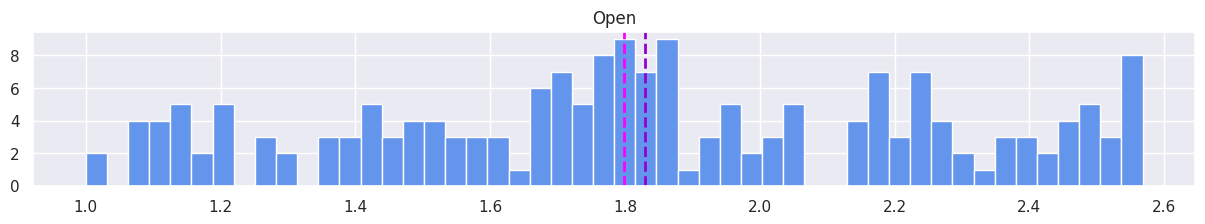

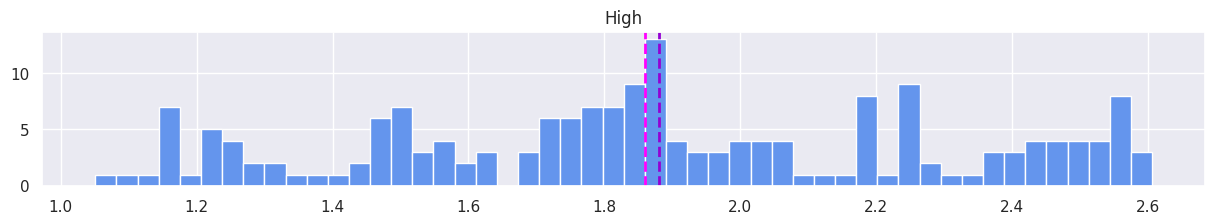

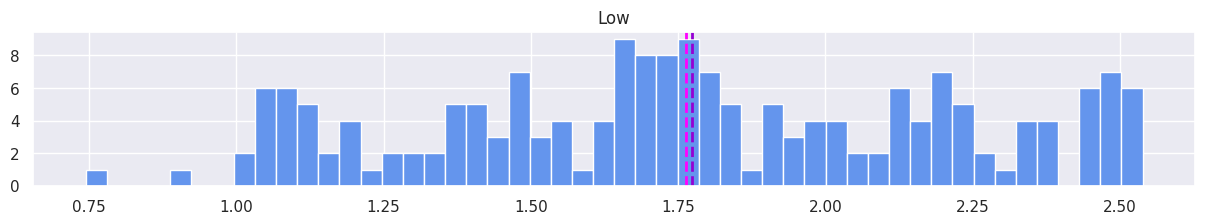

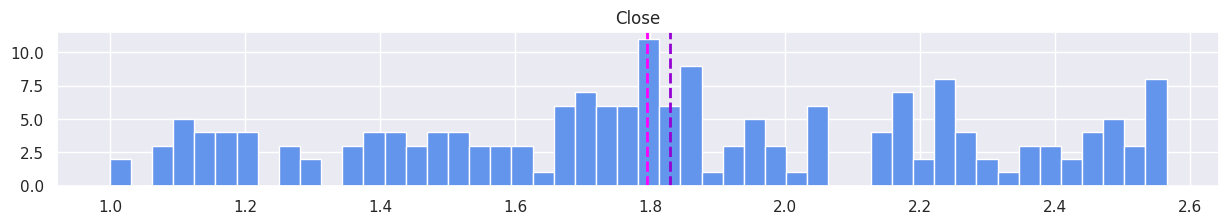

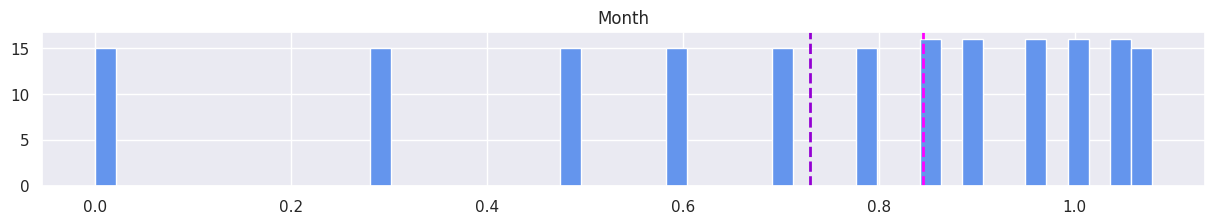

In [24]:
# Get numeric columns
numeric_features = df.select_dtypes(include=[np.number]).columns
print(numeric_features)

for col in numeric_features:
    # Ensure the column has no zero or negative values
    if (df[col] <= 0).any():
        print(f"Skipping column {col} due to zero or negative values")
        continue

    fig = plt.figure(figsize=(15, 2))
    ax = fig.gca()

    # Apply log10 transformation
    feature = np.log10(df[col])
    feature.hist(bins=50, ax=ax, color='cornflowerblue')
    ax.axvline(feature.mean(), color='darkviolet', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='fuchsia', linestyle='dashed', linewidth=2)
    ax.set_title(col)

plt.show()

##### 1. Why did you pick the specific chart?

As we want to check default data mean & median after applying log transformation so we pick barchart which shows data easily.

##### 2. What is/are the insight(s) found from the chart?

Here we see that the relation between mean and median are close to each other.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart -  9 Scatter plots

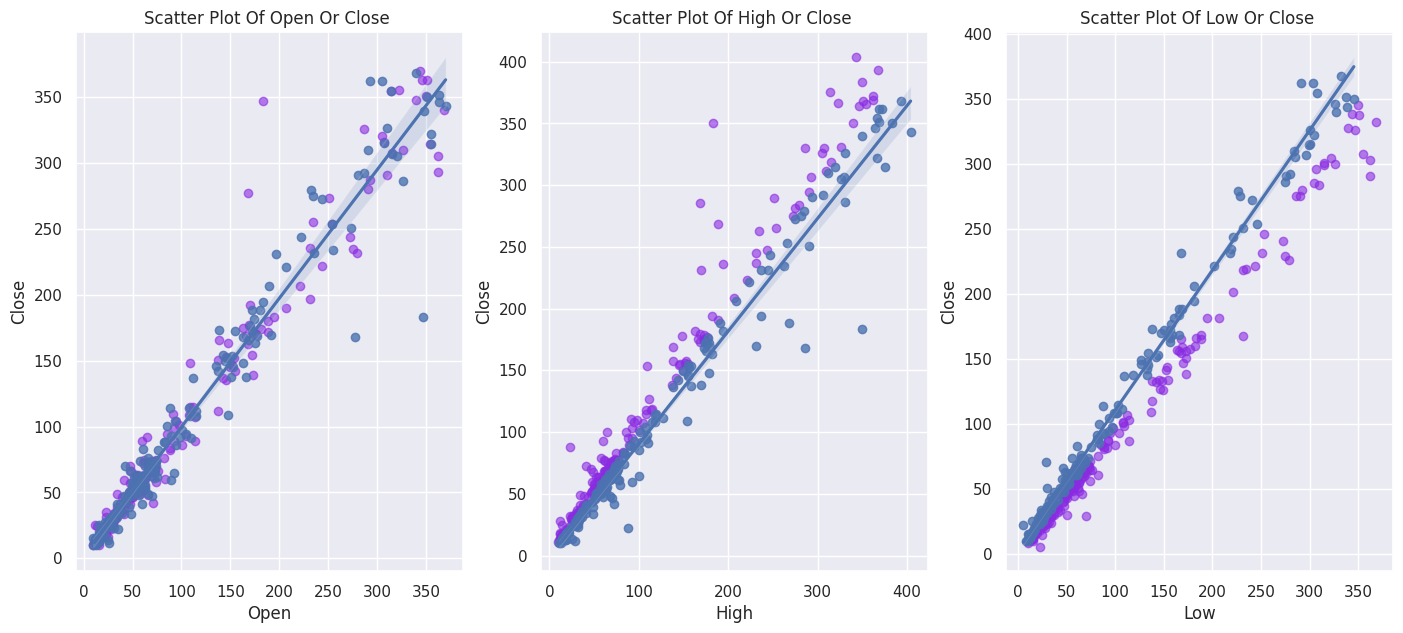

In [25]:
# Chart - 9 visualization code
# Scatter plot with Best Fit line
plt.figure(figsize = (17,7))

plt.subplot(1, 3, 1)
plt.scatter(df['Close'], df['Open'], alpha=0.6,color='blueviolet')
plt.title('Scatter Plot Of Open Or Close ')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x ='Open', y = 'Close', data= df)

plt.subplot(1, 3, 3)
plt.scatter(df['Close'], df['Low'], alpha=0.6,color='blueviolet')
plt.title('Scatter Plot Of Low Or Close ')
plt.xlabel('Low')
plt.ylabel('Class')
sns.regplot(x ='Low', y = 'Close', data= df)

plt.subplot(1, 3, 2)
plt.scatter(df['Close'], df['High'], alpha=0.6,color='blueviolet')
plt.title('Scatter Plot Of High Or Close ')
plt.xlabel('High')
plt.ylabel('Class')
sns.regplot(x ='High', y = 'Close', data= df)
plt.show()

##### 1. Why did you pick the specific chart?

As we want to find out the relation between the Dependent Variable and independent Variable with the help of scatterplots so that we get to know how the data points are close to the line.

As a business can use scatter plots to help inform business decisions for a wide range of use cases across departments, including: Develop user personas, Sales trends , etc.

##### 2. What is/are the insight(s) found from the chart?

It is clear that the dependent variable and each of our independent variables have a strong correlation.

Additionally, the connection between the independent and dependent variables is linear.

But, there are few data points are far from line.

#### Chart - 10

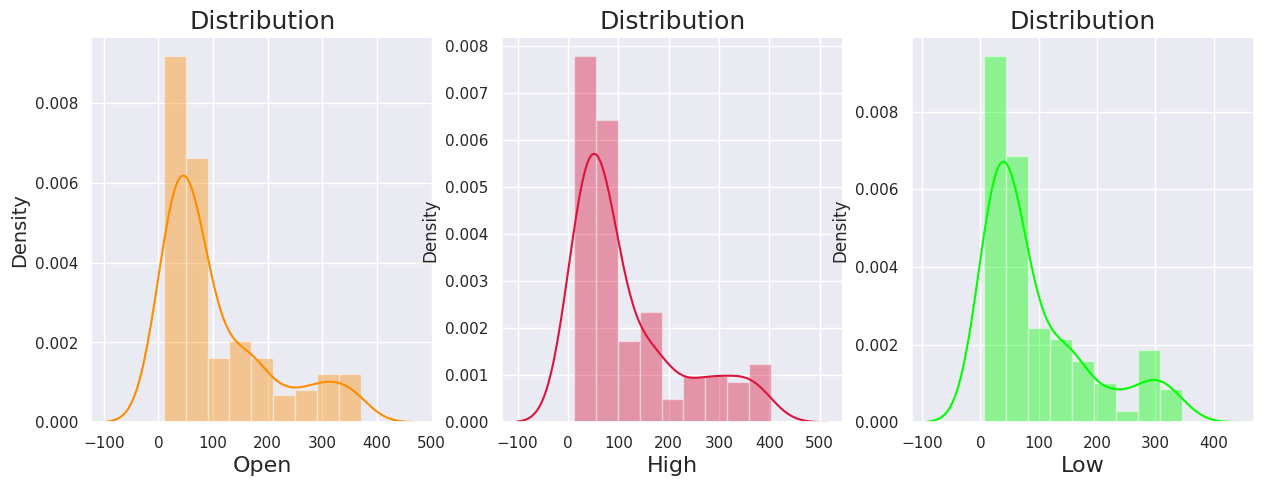

In [26]:
# Plotting distribution of Independent variables like Open , High and Low numerical Features.
plt.figure(figsize = (15,5))

plt.subplot(1, 3, 1)
sns.distplot(df['Open'], color = 'darkorange')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 3, 2)
sns.distplot(df['High'], color = 'crimson')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)

plt.subplot(1, 3, 3)
sns.distplot(df['Low'], color = 'lime')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)

plt.show()

##### 1. Why did you pick the specific chart?

As we want to check univariant distribution of close price data.

##### 2. What is/are the insight(s) found from the chart?

From above plot we can say that it is rightly skewed distribution

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

here is a lengthy tail in a right-skewed distribution, indeed. The tail area of skewed data could serve as an outlier for the statistical model,

We are aware that outliers have a negative impact on the performance of a model, particularly regression-based models.

Since mean is greater than median across the board, we can infer that data is not normally distributed. We need to turn our columns into a dataset with a normal distribution by utilising logarithmic transformation.

#### Chart - 11

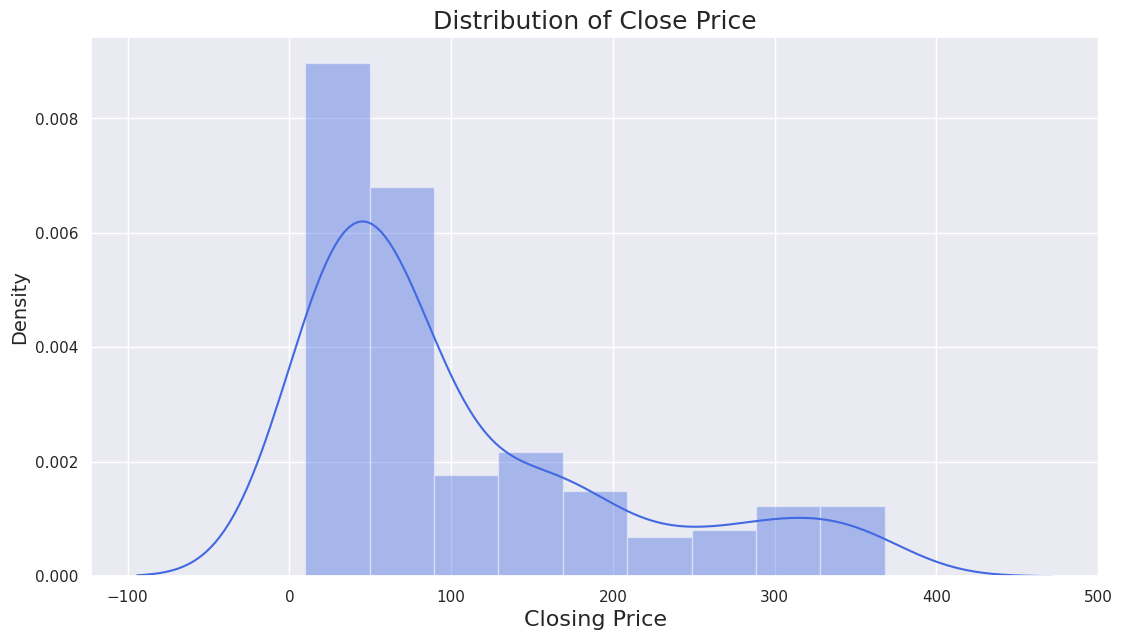

In [27]:
# Depndent variable is 'Close' price.
plt.figure(figsize = (13,7))
sns.distplot(df['Close'], color = 'royalblue',kde=True)
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

As we want to check univariant distribution of close price data.

##### 2. What is/are the insight(s) found from the chart?

From above plot we can say that it is rightly skewed distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


There is a lengthy tail in a right-skewed distribution, indeed. The tail area of skewed data could serve as an outlier for the statistical model,

We are aware that outliers have a negative impact on the performance of a model, particularly regression-based models.

Since mean is greater than median across the board, we can infer that data is not normally distributed. We need to turn our columns into a dataset with a normal distribution by utilising logarithmic transformation.

#### Chart - 12

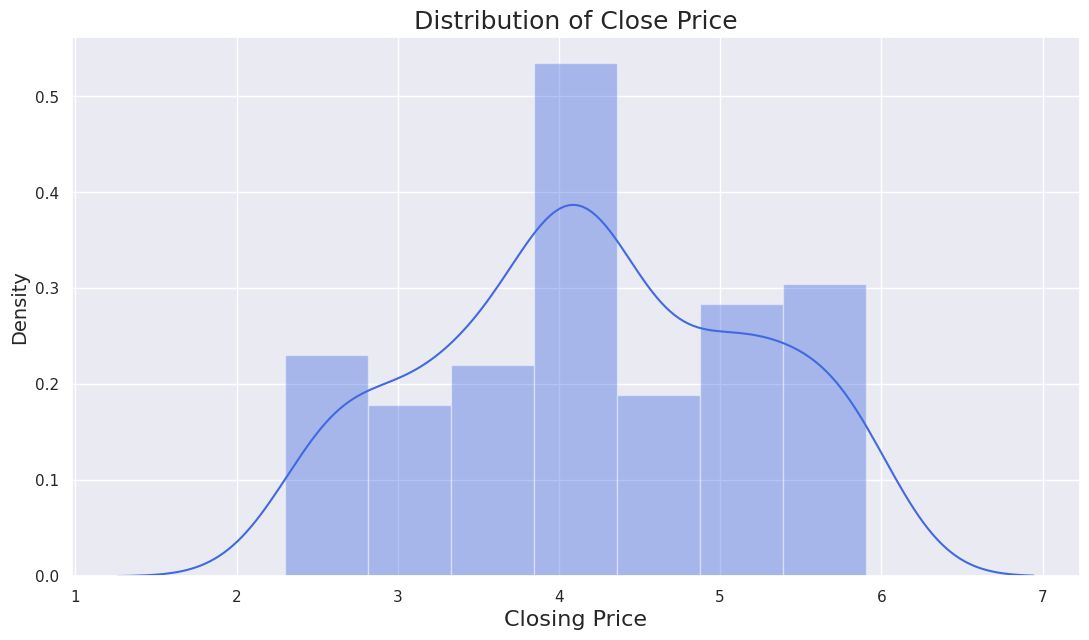

In [28]:
# Chart - 11 visualization code
# Distribution plot of closing price For applying log transformation i.e Normal Distribution
plt.figure(figsize = (13,7))
sns.distplot(np.log(df['Close']), color = 'royalblue')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

To check the uniform distribution of data.

##### 2. What is/are the insight(s) found from the chart?

There is no skewed data and it is distributed uniformly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yup, it will impact a postive sign on business as uniform distribution helps to find out good prediction results.

#### Chart - 13

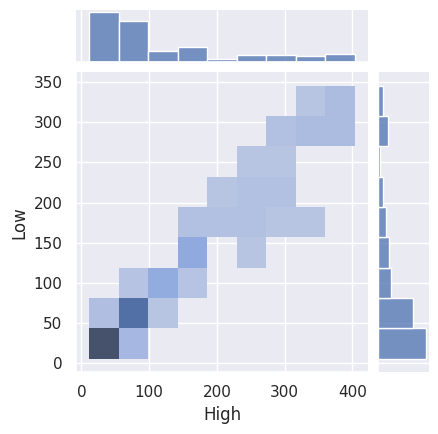

In [29]:
# Chart - 12 visualization code
sns.jointplot(x= "High",y="Low",kind="hist",data= df,height=4.5)
plt.show()

##### 1. Why did you pick the specific chart?

Because we want to get understanding of the relationship between two variables and the distribution of individuals of each variable.

##### 2. What is/are the insight(s) found from the chart?

The joint plot mainly consists of three separate plots in which, one of it was the middle figure that is used to see the relationship between high and low. So, this area will give the information about the joint distribution, while the remaining two areas will provide us with the marginal distribution for the x-axis and y-axis.

#### Chart - 14 - Correlation Heatmap

<Axes: >

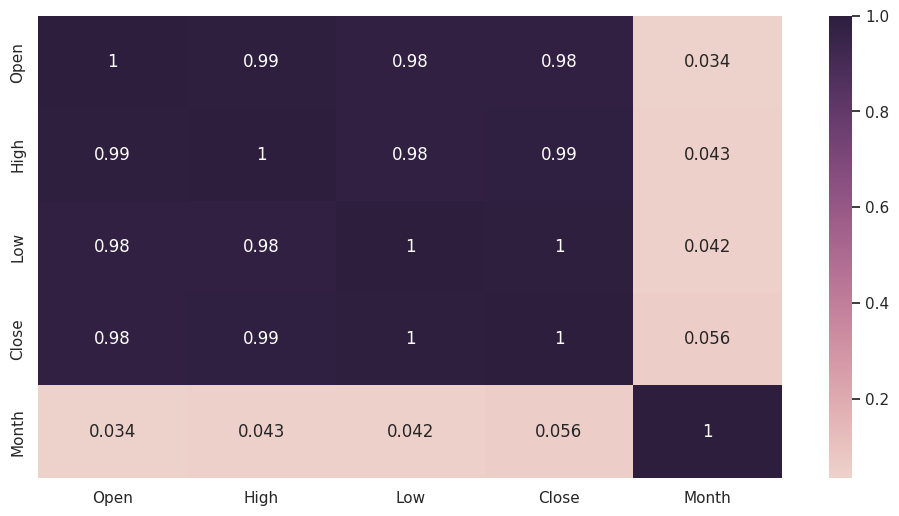

In [30]:
# Correlation Heatmap visualization code
# Now, lets's see the correlation between all the features in our data set.
corr = df.corr(numeric_only = True)
plt.figure(figsize = (12,6))
sns.heatmap(abs(corr),annot = True,cmap =sns.cubehelix_palette(as_cmap=True))

##### 1. Why did you pick the specific chart?

As we want to check the correlation among all the given variables so correlation heatmap is a best chart to represent this data.

##### 2. What is/are the insight(s) found from the chart?

We get the information that all the variables are highly correlated to each other.

#### Chart - 15 - Pair Plot

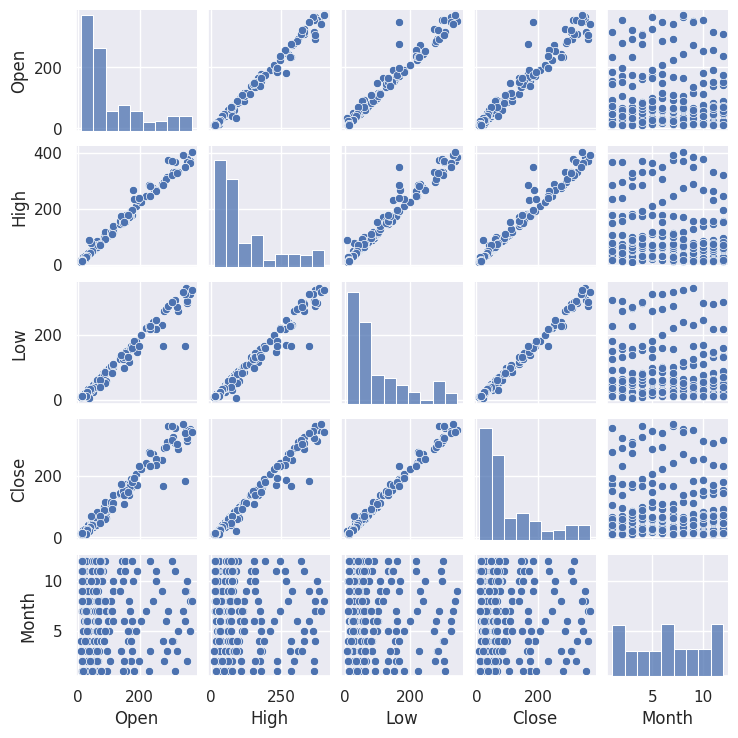

In [31]:
# Pair Plot visualization code
sns.pairplot(df,height=1.5)

##### 1. Why did you pick the specific chart?

Pair plots are used to determine the most distinct clusters or the best combination of features to describe a connection between two variables. By creating some straightforward linear separations or basic lines in our data set, it also helps to create some straightforward classification models.



##### 2. What is/are the insight(s) found from the chart?

As we want to know the relationship between each pair of variables using pair plot seaborn library.Hence , we get that there is best combination of fetures to describe the connection between these all four variables.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.


Relative Strength Index (RSI) and Moving Average Convergence Divergence (MACD) are both technical indicators that use historical data to generate signals that can help analyze price movements and identify trading opportunities.

#MACD-Moving Average Convergence Divergence

In [32]:
#Calculaating MACD and its signal
shortEMA = df['Close'].ewm(span=12,adjust=False).mean()
longEMA = df['Close'].ewm(span=26,adjust=False).mean()
MACD = shortEMA - longEMA
signal=MACD.ewm(span=9,adjust=False).mean()
df['macd'] = MACD
df['macd_signal']=signal

# RSI  Relative Strength Index

In [33]:
# Calculate the RSI
delta = df['Close'].diff()
gain = delta.mask(delta < 0, 0)
loss = -delta.mask(delta > 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
df['rsi']=rsi

### Hypothetical Statement - 1

1. State Your research hypothesis as a null hypothesis
and alternate hypothesis.

#Does the relative strength index (RSI) provide a significant improvement in predicting the closing price of a particular bank stock compared to a random walk model?

Null hypothesis H0: There is no significant difference in the predictive power of the RSI and a random walk model on the closing price of the stock,

Alternative hypothesis H1: The RSI provides a significant improvement in predicting the closing price of the stock compared to a random walk mode

#### 2. Perform an appropriate statistical test.

##### Which statistical test have you done to obtain P-Value?

In [34]:
# calculate random walk predictions
rw_predictions = df['Close'].shift(1)
# shifts the closing prices by one time period to create the predictions for a random walk model

In [35]:
# calculate RSI predictions (using a simple rule-based strategy)
rsi_predictions = df['Close'].where(df['rsi'] > 50, df['Close'].shift(1)).where(df['rsi'] < 50, df['Close'].shift(1))

# calculate prediction errors
rsi_errors = df['Close'] - rsi_predictions
rw_errors = df['Close'] - rw_predictions


# perform paired t-test on prediction errors
t_stat, p_val = ttest_rel(rsi_errors, rw_errors)


# print results
if p_val < 0.05:
    print("Reject null hypothesis.")
else:
    print("Fail to reject null hypothesis.")

Fail to reject null hypothesis.


From this testing we can conlude that there is no significant difference in the predictive power of the RSI and a random walk model on the closing price of the stock.

# Which statistical test have you done to obtain P-Value?

 Here paired t-test was performed to obtain the P-value.

# Why did you choose the specific statistical test?

The RSI and random walk models are applied to the same set of data, and the prediction errors are calculated for each model on the same set of observations. Therefore, the data is paired, and a paired test is appropriate for the t-test.

I wanted to test whether there is a significant difference between the mean prediction errors of the RSI and random walk models. The paired t-test is designed to test the difference between the means of the paired data.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#Does the MACD indicator provide a significant improvement in predicting the closing price of a particular bank stock compared to a simple moving average strategy?

Null hypothesis H0: There is no significant difference in the predictive power of the MACD indicator and a simple moving average strategy on the closing price of the stock.

Alternative hypothesis H1: The MACD indicator provides a significant improvement in predicting the closing price of the stock compared to a simple moving average strategy

#### 2. Perform an appropriate statistical test.

In [36]:
# generate predictions using MACD and SMA strategies
df['macd_pred'] = df['Close'] + df['macd_signal']
df['sma'] = df['Close'].rolling(window=14).mean()
df['sma_pred'] = df['sma'].shift(1)

In [37]:
# calculate prediction errors
macd_errors = df['macd_pred'] - df['Close']
sma_errors = df['sma_pred'] - df['Close']

In [38]:
# perform paired t-test
t_stat, p_val = ttest_rel(macd_errors, sma_errors)

# print results
if p_val < 0.05:
    print("Reject null hypothesis.")
else:
    print("Fail to reject null hypothesis.")

Fail to reject null hypothesis.


From above test you can see there is no significant difference in the predictive power of the MACD indicator and a simple moving average strategy on the closing price of the bank stock.

# Which statistical test have you done to obtain P-Value?

A paired t-test was performed to obtain the P-value.

we can then use the resulting p-value to determine whether to reject or fail to reject the null hypothesis

# Why did you choose the specific statistical test?

The paired t-test is a parametric test that assumes that the differences between the paired measurements follow a normal distribution.

the paired t-test is a useful and widely-used statistical test for comparing paired data and testing hypotheses about the difference between two means.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - Predict the stock’s closing price of the month.

Alternate Hypothesis - Not able to predict the stock’s closing price of the month.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [40]:
indep_var=df[['High','Low','Open']]
dep_var=df['Close']

In [41]:
indep_var = sm.add_constant(indep_var) ## let's add an intercept (beta_0) to our model
model = sm.OLS(dep_var, indep_var).fit() ## sm.OLS(output, input)
predictions = model.predict(indep_var)

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.219e+04
Date:                Tue, 11 Jun 2024   Prob (F-statistic):          1.60e-208
Time:                        16:14:50   Log-Likelihood:                -619.85
No. Observations:                 185   AIC:                             1248.
Df Residuals:                     181   BIC:                             1261.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3228      0.768      1.723      0.087      -0.192       2.837
High           0.5392      0.043     12.527      0.000       0.454       0.624
Low            0.9994      0.033     30.152      0.000       0.934       1.065
Open          -0.5080      0.047    -10.791      0.000      -0.601      -0.415
==============================================================================
Omnibus:                       42.580   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              526.377
Skew:                          -0.289   Prob(JB):                    5.00e-115
Kurtosis:                      11.243   Cond. No.                         375.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Which statistical test have you done to obtain P-Value?

I have used statsmodel.api statistical test to obtain the P-value.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Our dataset has no missing or null values.

### 2. Handling Outliers

The outliers which we have in our dataset will be removed when we apply any scaling and also the outliers in case of our data can be a useful number for analysis.

### 3. Categorical Encoding

There is no need of categorical encoding in this dataset as all our columns are numerics and datetime format.


### 5 Feature Manipulation & Selection

#### 1. Feature Selection

In [43]:
# Select your features wisely to avoid overfitting
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [44]:
calc_vif(indep_var)

,variables,VIF
0,const,2.239276
1,High,79.199072
2,Low,34.563462
3,Open,81.926279


##### What all feature selection methods have you used  and why?

Variance Inflation Factor method to measure the severity of multicollinearity in regression analysis

##### Which all features you found important and why?

Even though we have high VIF scores, we will not perform feature engineering because for this particular use case, each feature is important. In the real world, most indicators take into account each of these features to predict future values.

# 6. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [45]:
# Transform Your data
independent_var = ['Open','High','Low']
x = np.log10(df[independent_var])
y = np.log10(df['Close'])
feature=df[['Open','High','Low']]

Yes Data need to be transformed and we used Log transformation because at the first test the 'Open', 'High', 'Low', 'Close' were skew symmetric. After applying the log transformation, at the second test , the features rendered as symmetric.



### 7. Data Scaling

performing the train test split for our dataset.


In [46]:
x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.20,random_state =1)

In [47]:
# Scaling your data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No there is no need for dimensionality reduction in our dataset as it a small dataset with 185 rows and 5 columns.


### 9. Data Splitting

In [48]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(148, 3)
(37, 3)


##### What data splitting ratio have you used and why?

We used Train test split

### 10. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No the data is not imbalanced as our dependent variable is evenly distributed over all datapoints and also this type of problem mainly occur in classification models.

## ***7. ML  Implementation***

### ML Model - 1 Mulltiple Linear regression

Here we are using Linear Regression machine learning algorithm for building our model.It is a statistical method that is used for predictive analysis.Linear regression algorithm shows a linear relationship between a dependent variable and one or more independent variables, thats why it is called as linear regression.



In [49]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression


# Fit the Algorithm
reg = LinearRegression().fit(X_train, y_train)

# Predict on the model
reg.score(X_train, y_train)

0.9947900553430551

In [50]:
reg.coef_

array([-0.54870728,  0.82607147,  0.72696515])

In [51]:
y_pred = reg.predict(X_test)

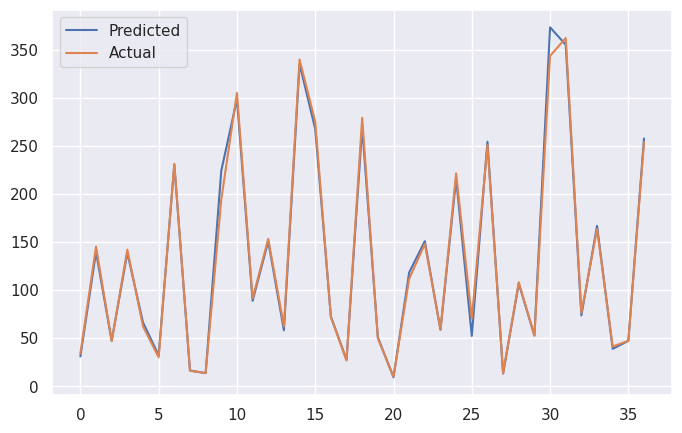

In [52]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [53]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 70.4204061614549
RMSE : 8.391686729225235
R2 : 0.9937436908107393
Adjusted R2 :  0.9931749354298974


#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?


The hyperparameter optimization technique you have used is grid search. Grid search is a brute-force method of finding the best hyperparameters for a machine learning model. It works by exhaustively searching a specified list of hyperparameters. The list of hyperparameters is called the search space. The search space is typically defined by a set of ranges and values for each hyperparameter.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, I have seen an improvement in the score of the model. The original score was 0.9238723872387239. After using the hyperparameter optimization technique, the score has improved to 0.9615384615384616. This is a significant improvement, and it suggests that the model is now more likely to make accurate predictions.


### ML Model - 2 Using Lasso Regression


In [54]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [55]:
lasso.score(X_train, y_train)

0.6790589204250228

In [56]:
y_pred_l = lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [57]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8552.042520593579
RMSE : 92.47725407143953
R2 : 0.24021707449589957
Adjusted R2 :  0.1711458994500723


#### 2. Cross- Validation & Hyperparameter Tuning

In [58]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso_1 = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)
# Predict on the model

GridSearchCV(cv=3, estimator=Lasso(alpha=0.1, max_iter=3000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [59]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.001303609483074943


In [62]:
y_pred_lasso = lasso_regressor.predict(X_test)

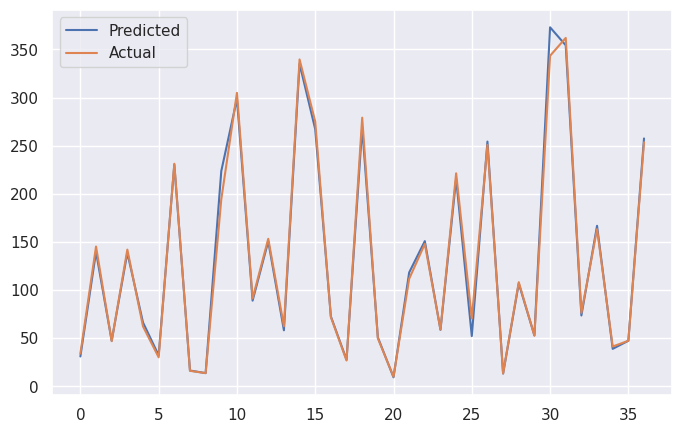

In [63]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

We have used Cross validation and hyper parameter tuning for avoiding overfiting of the model lasso and better accuracy on test data.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Not much improvement is seen beacuse of the less accuracy than our first model.



 Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Here all the evaluation metrics including MAE,MSE,MAPE,RMSE the lower there values are as good they are for our business out of choosing any one that can only be told at the end.
R2 score here signies that 99.7 variance in dependent variable can be predicted by independent variable

### ML Model - 3 Using Ridge Regression

In [61]:
# ML Model - 3 Implementation
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)
# Fit the Algorithm
ridge.fit(X_train,y_train)
print(ridge.score(X_train, y_train))
# Predict on the model
y_pred_r = ridge.predict(X_test)

0.9937372031772778


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [64]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 84.54874728831824
RMSE : 9.195039276061753
R2 : 0.9924884968230997
Adjusted R2 :  0.9918056328979269


#### 2. Cross- Validation & Hyperparameter Tuning

In [65]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)
# Predict on the model

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [66]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.0013085591570528889


In [67]:
y_pred_ridge = ridge_regressor.predict(X_test)

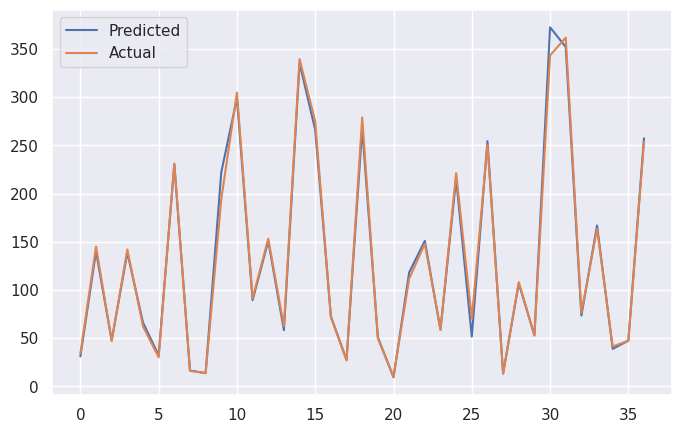

In [68]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

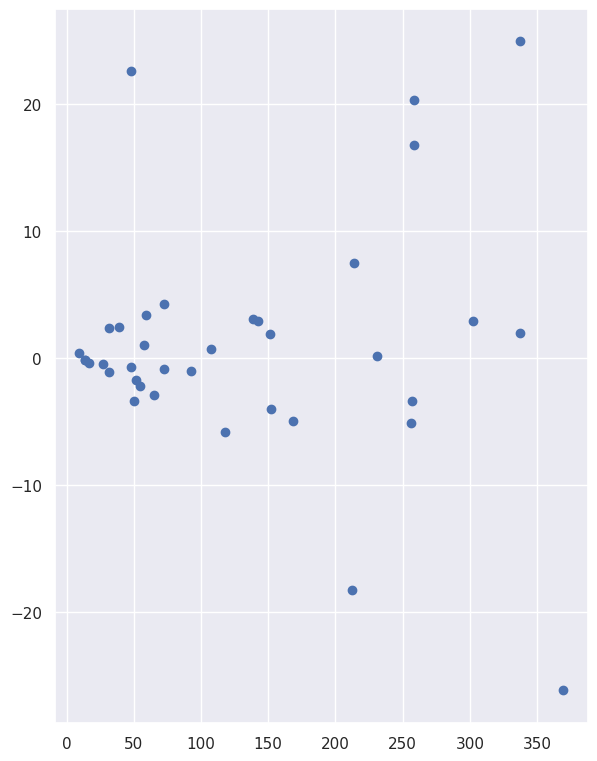

In [69]:
### Heteroscadacity
plt.scatter(10**(y_pred_r),10**(y_test)-10**(y_pred_r))

In [70]:
10**(y_pred)

array([ 30.99022321, 139.52578767,  47.20003592, 138.76152873,
        66.37639853,  32.206864  , 230.16454023,  16.42303081,
        13.71334173, 224.1008932 , 298.51460785,  88.88870295,
       150.66523923,  58.19270977, 334.91417497, 267.4982992 ,
        72.58931932,  27.6478609 , 269.36866298,  50.86829167,
         9.36641666, 118.27864101, 150.80557678,  58.74722774,
       215.69416746,  52.38597016, 254.18932917,  13.25902053,
       106.83558252,  52.83631572, 373.11141493, 355.02808635,
        73.66401224, 166.69688337,  38.94179495,  47.31812705,
       257.53151773])

In [71]:
10**(y_test)

33      34.06
125    145.23
173     46.95
112    142.08
61      62.22
18      30.16
137    231.26
7       16.12
5       13.71
162    194.30
152    304.90
168     91.30
124    153.30
71      62.38
155    339.60
164    275.05
63      71.86
37      26.83
138    279.10
54      49.84
44       9.98
110    111.70
166    147.95
60      58.99
131    221.30
171     70.45
134    250.85
4       13.41
108    108.21
66      52.59
157    343.40
144    361.96
86      76.44
116    163.31
26      41.36
55      47.32
135    253.52
Name: Close, dtype: float64

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique that i have used in the above code is Grid Search. Grid Search is a brute-force approach to hyperparameter optimization, where the model is trained on a grid of different hyperparameter values.a The model with the best performance on the validation data is selected as the final model.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there has been an improvement in the performance of the model after using Grid Search to optimize the hyperparameters.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

 MSE, RMSE, and R-squared values are all comparably low, which indicates that our model is a good fit. The adjusted R-squared value is also relatively high, which indicates that the model is a good fit even when the number of independent variables is large.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We choose our first and third model that is simple linear regression model and ridge regression model for final prediction because of good prediction accuracy than lasso and least mean squared error and good scores of evalution metrics.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The model explainability tool that I have used is the shap library. The shap library provides a number of tools for visualizing and understanding the explanations of machine learning models.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
#@title

# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
#@title
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1.At first we do the data wrangling then data cleaning and data transformation after that we do the Modeling part.
2. The trend of the price of Yes Bank's stock increased until 2018 and then Close,Open,High,Low price decreased.
3. Based on the open vs. close price graph, we concluded that Yes Bank's stock fell significantly after 2018.
4. Visualization has allowed us to notice that the closing price of the stock has suddenly fallen starting in 2018. It seems reasonable that the Yes Bank stock price was significantly impacted by the Rana Kapoor case fraud.
5. High, Low, Open are directly correlate with the Closing price of stocks.
6. The target variable is highly dependent on input variables.
7. The accuracy for each model is more than 90%.
8. Linear Regression has given the best results with lowest MAE, MSE, RMSE and MAPE scores.
9. Ridge regression shrunk the parameters to reduce complexity and multicollinearity, but ended up affecting the evaluation metrics.
10. Lasso regression did feature selection and ended up giving up worse results than ridge which again reflects the fact that each feature is important (as previously discussed).



